In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from Bayesian_SIR import Bayesian_SIR

### Parameter initialization

In [2]:
N = 1_000_000
T = 101
I0 = 50

betas = 25*[0.3]+25*[.4]+25*[.25]+26*[.2]
gammas = 25*[0.05]+25*[.15]+25*[.2]+26*[.25]

SIR_model = Bayesian_SIR([N, T, I0], betas, gammas)

### Simulation

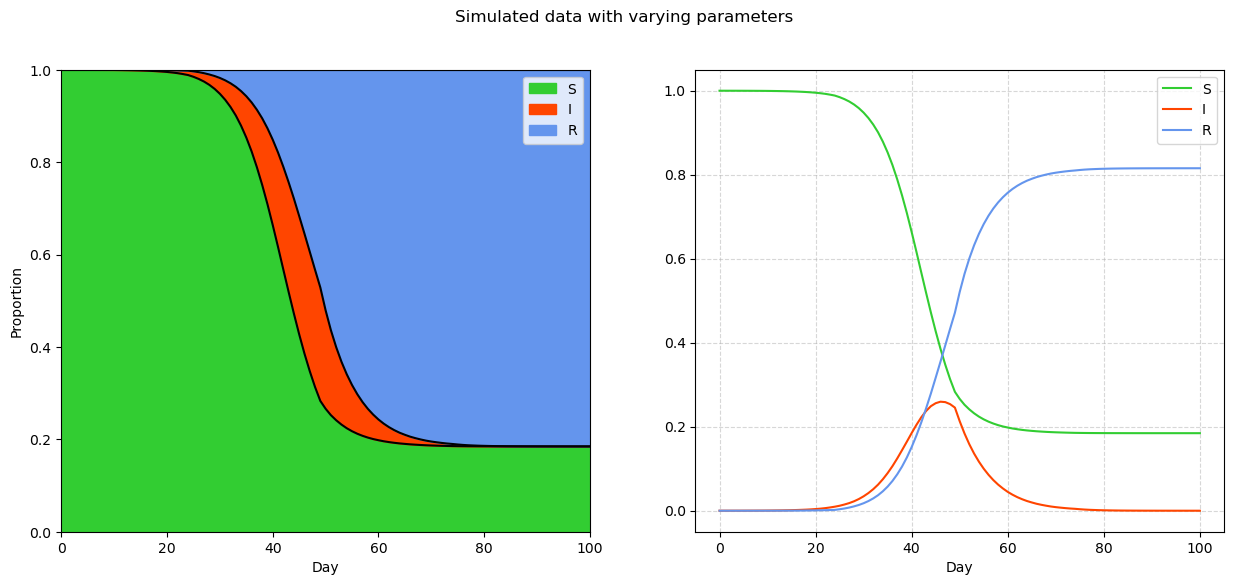

In [3]:
SIR_model.simulation()

## Full run on simulated data

In [4]:
n_steps = 25_000
p = 0.01
T = T - 1
burnin = 5_000
thin = 10

SIR_model.run(p, n_steps, burnin, thin)

Updating beta, gamma and delta parameters...


Buffering...:   0%|          | 0/25000 [00:00<?, ?it/s]

## Bayesian estimators

In [5]:
deltas_samples = SIR_model.deltas_samples
bs_samples = SIR_model.bs_samples
rs_samples = SIR_model.rs_samples
betas_samples = SIR_model.betas_samples
gammas_samples = SIR_model.gammas_samples

## Find Bayes estimator $\hat{\delta}$

In [6]:
SIR_model.find_Bayes_delta()
delta_final = SIR_model.delta_final

Finding best delta minimizing the loss...


Loading...:   0%|          | 0/100 [00:00<?, ?it/s]

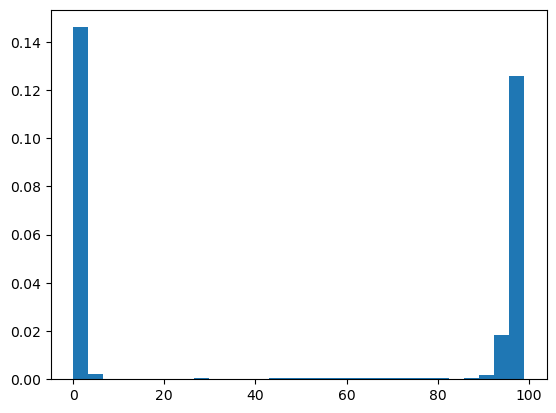

In [7]:
where = np.where(deltas_samples == 1)[0]
plt.hist(where, bins = 30, density=True);

In [8]:
delta_final

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [9]:
np.where(delta_final == 1)[0]

array([ 0, 98], dtype=int64)

In [10]:
SIR_model.ARI(delta_final, np.array(([1]+[0]*24)*4))

0.0008304406317971443

In [11]:
SIR_model.MI(delta_final, np.array(([1]+[0]*24)*4))

0.015152030488139623

In [22]:
SIR_model_real = Bayesian_SIR([None]*3, [], [])

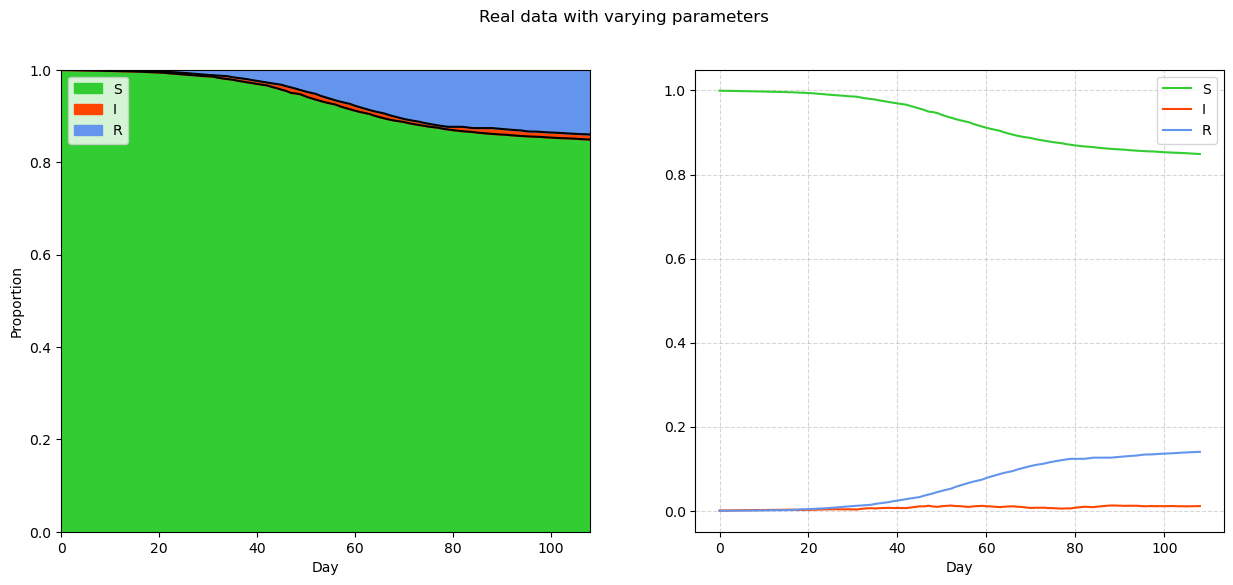

Updating beta, gamma and delta parameters...


Buffering...:   0%|          | 0/25000 [00:00<?, ?it/s]

In [23]:
SIR_model_real.run(p, n_steps, burnin, thin, data_file='Singapore_new.csv')

In [24]:
deltas_samples = SIR_model_real.deltas_samples
bs_samples = SIR_model_real.bs_samples
rs_samples = SIR_model_real.rs_samples
betas_samples = SIR_model_real.betas_samples
gammas_samples = SIR_model_real.gammas_samples

In [25]:
SIR_model_real.find_Bayes_delta()
delta_final = SIR_model.delta_final
delta_final

Finding best delta minimizing the loss...


Loading...:   0%|          | 0/100 [00:00<?, ?it/s]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

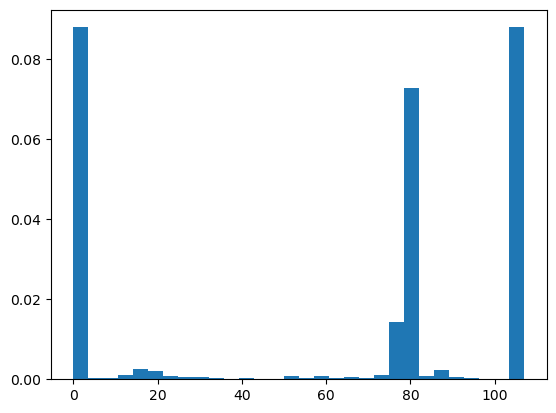

In [26]:
where = np.where(deltas_samples == 1)[0]
plt.hist(where, bins = 30, density=True);

In [27]:
np.where(delta_final == 1)[0]

array([ 0, 98], dtype=int64)